Blending is done by addWeighted, it is 

In [71]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [72]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

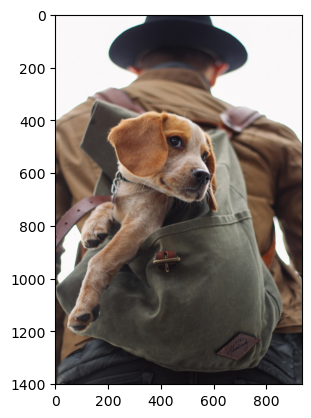

In [73]:
plt.imshow(img1)

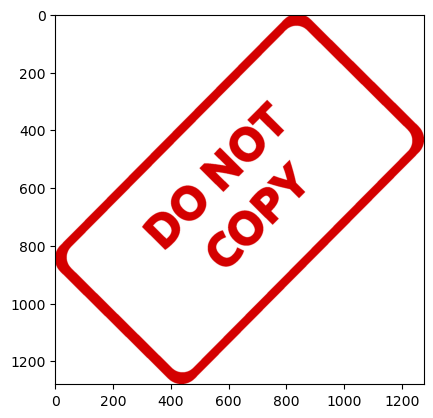

In [74]:
plt.imshow(img2)

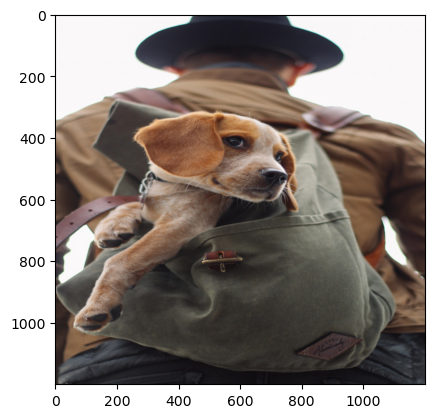

In [75]:
#Blending imges of the same size
img1 = cv2.resize(img1, (1200,1200))
plt.imshow(img1)


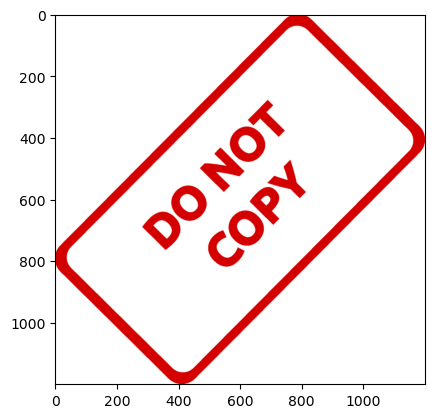

In [76]:
img2 = cv2.resize(img2,(1200,1200))
plt.imshow(img2)

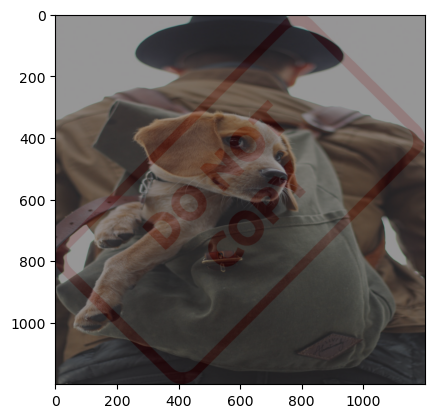

In [77]:
#Blending
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.1, gamma = 0)
plt.imshow(blended)

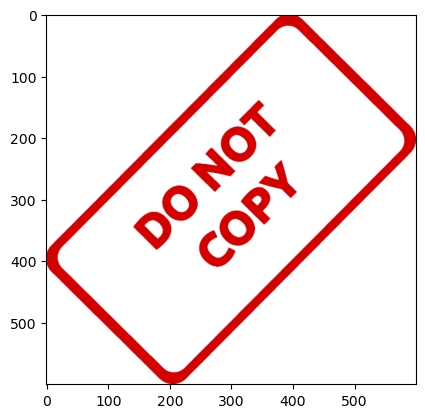

In [78]:
#Overlay small img on top of a larger img (NO BLENDING)
#Numpy reassignment
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2 = cv2.resize(img2, (600,600))
plt.imshow(img2)

In [79]:
large_img = img1
small_img = img2

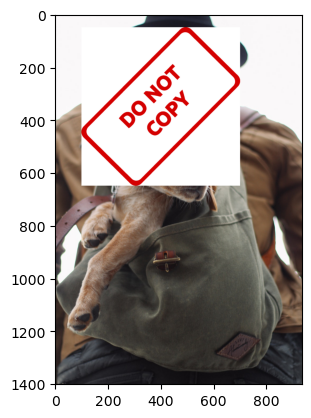

In [80]:
x_offset = 100                   
x_end = x_offset + small_img.shape[1]
y_offset = 50
y_end = y_offset + small_img.shape[0]
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

In [81]:
#Blend together images 
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [82]:
img2 = cv2.resize(img2, (600,600))

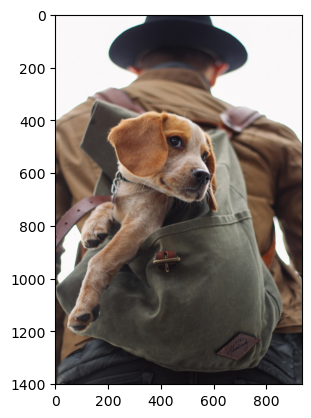

In [83]:
plt.imshow(img1)

In [84]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [85]:
#Generalize shape of img
rows, cols, channels = img2.shape

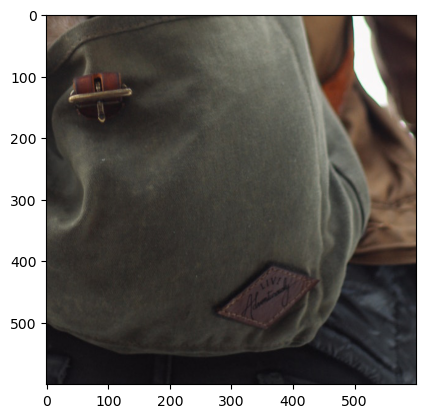

In [86]:
roi = img1[y_offset:1401, x_offset:934]
plt.imshow(roi)

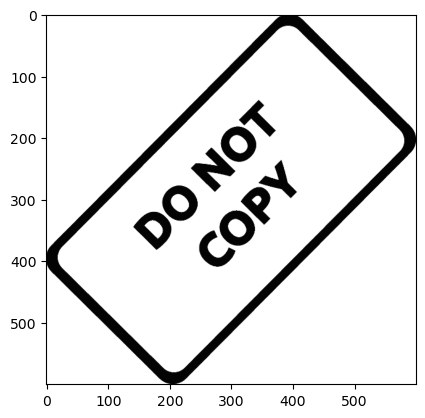

In [87]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap = 'gray')

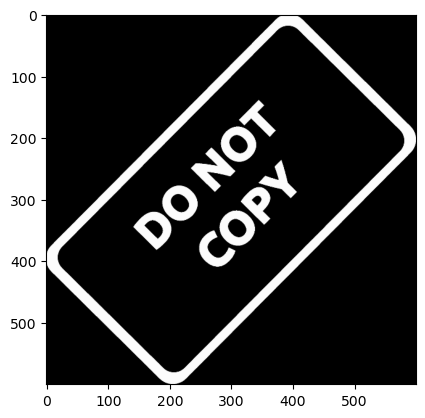

In [88]:
#Flip colors, but bitwise delet color chanless
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')

In [89]:
white_background = np.full(img2.shape, 255,dtype=np.uint8)
white_background.shape

(600, 600, 3)

In [90]:
background = cv2.bitwise_or(white_background, white_background, mask = mask_inv)
background.shape

(600, 600, 3)

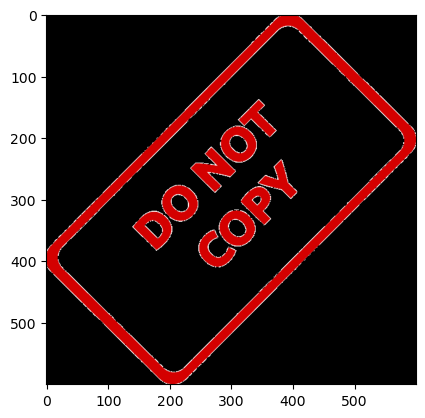

In [91]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

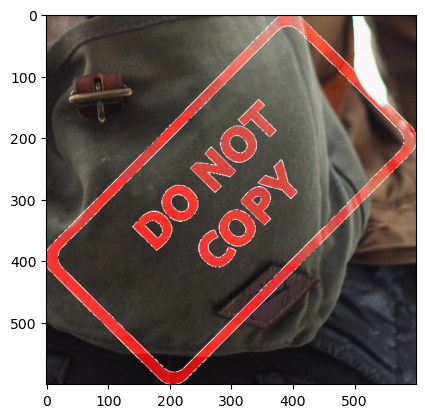

In [92]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

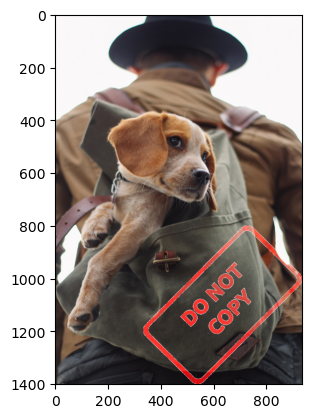

In [94]:
large_img = img1
small_img = final_roi
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)